<a href="https://colab.research.google.com/github/2003a52071/statml/blob/main/final_project_DT%2CSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd

In [149]:
d=pd.read_csv('/content/Data_for_UCI_named (1).csv')


In [150]:
d.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [151]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8674 entries, 0 to 8673
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    8674 non-null   float64
 1   tau2    8674 non-null   float64
 2   tau3    8674 non-null   float64
 3   tau4    8674 non-null   float64
 4   p1      8674 non-null   float64
 5   p2      8674 non-null   float64
 6   p3      8674 non-null   float64
 7   p4      8674 non-null   float64
 8   g1      8674 non-null   float64
 9   g2      8673 non-null   float64
 10  g3      8673 non-null   float64
 11  g4      8673 non-null   float64
 12  stab    8673 non-null   float64
 13  stabf   8673 non-null   object 
dtypes: float64(13), object(1)
memory usage: 948.8+ KB


In [152]:
d.shape

(8674, 14)

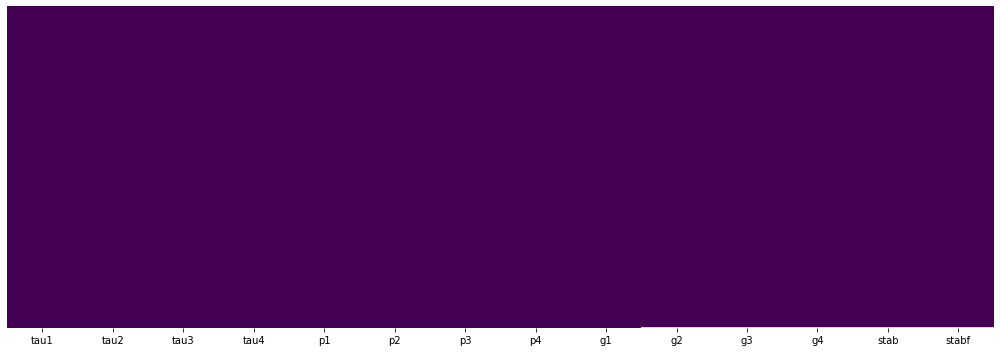

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(df):
 #this function gives heatmap of all non values
 plt.figure(figsize=(14,5))
 sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')
 plt.tight_layout()
 return plt.show()
 
get_heatmap(d)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


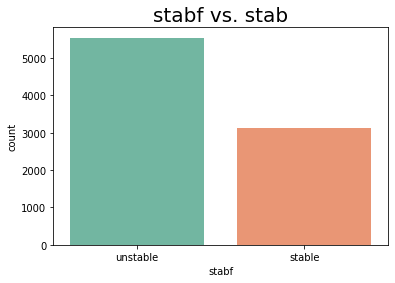

In [154]:
sns.countplot(d['stabf'], palette = 'Set2')
plt.title ('stabf vs. stab', fontsize = 20)
plt.show()

In [155]:
d.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [156]:
d.shape

(8674, 14)

In [157]:
#importing standardscaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

#standardizing the data apart from the class column
data_scaled=d.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

#data_scaled = pd.DataFrame(sst.fit_transform(df.drop('Outbreak',axis=1)))
#Adding the class column back to the DataFram

In [162]:
data_scaled.columns=['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4','stab','stabf']

In [158]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.832906,-0.789931,1.141667,1.647989,0.012463,1.086541,-0.016467,-1.092937,0.452601,1.223018,1.316023,1.582669,1.068339
1,1.478818,-0.127608,-0.805255,-1.422222,1.750280,-1.589089,-1.434471,-0.009640,-0.410807,1.233366,0.131556,0.938296,-0.591896
2,1.357717,1.306281,-0.805643,-1.478739,-0.464273,0.104432,-0.062130,0.764562,-1.322969,0.884081,1.141247,-1.517874,-0.336562
3,-1.649983,0.877910,-0.279929,-1.067726,0.279792,0.520488,-1.587028,0.586630,-0.291437,1.650536,1.468714,-0.593522,0.351301
4,-0.769129,0.855806,-0.113064,1.676029,-0.303571,0.293813,-1.372790,1.612055,0.986833,-0.251572,0.476759,1.081459,0.919739


In [163]:
data_scaled['class'] = d.stabf

In [164]:
data_scaled

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf,class
0,-0.832906,-0.789931,1.141667,1.647989,0.012463,1.086541,-0.016467,-1.092937,0.452601,1.223018,1.316023,1.582669,1.068339,unstable,unstable
1,1.478818,-0.127608,-0.805255,-1.422222,1.750280,-1.589089,-1.434471,-0.009640,-0.410807,1.233366,0.131556,0.938296,-0.591896,stable,stable
2,1.357717,1.306281,-0.805643,-1.478739,-0.464273,0.104432,-0.062130,0.764562,-1.322969,0.884081,1.141247,-1.517874,-0.336562,unstable,unstable
3,-1.649983,0.877910,-0.279929,-1.067726,0.279792,0.520488,-1.587028,0.586630,-0.291437,1.650536,1.468714,-0.593522,0.351301,unstable,unstable
4,-0.769129,0.855806,-0.113064,1.676029,-0.303571,0.293813,-1.372790,1.612055,0.986833,-0.251572,0.476759,1.081459,0.919739,unstable,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,-0.187558,1.425299,0.361293,-0.340741,-0.073209,0.964944,-0.645323,-0.190756,0.680467,1.011432,0.546706,0.064374,1.486557,unstable,unstable
8670,0.590095,1.269303,-0.765586,-1.679849,-1.422715,1.077966,1.407693,-0.020916,0.519939,1.137418,1.068105,1.394901,-0.100445,unstable,unstable
8671,1.457472,-1.377526,1.398786,0.168097,1.093644,-0.193148,-1.501580,-0.198857,-1.686686,1.086891,0.107653,-0.280340,-0.966215,stable,stable
8672,0.943964,-1.285075,-1.039681,0.595364,0.896052,-1.039190,-0.275225,-0.240147,-0.799138,0.903312,-1.588175,1.528338,-0.194081,unstable,unstable


In [165]:
data_scaled = data_scaled[data_scaled['class'].notna()]

In [166]:
#loading the data
x = data_scaled.iloc[:,0:13]
y = data_scaled.iloc[:,13:14]

In [167]:
y=y.replace('unstable',0)
y=y.replace('stable',1)

In [168]:
#splitting the dataset
#splitting the dataset into Train and Test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [169]:
X_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
1020,-0.970694,0.566600,1.546343,-0.495574,-0.616293,0.215899,-0.532121,1.389137,1.122015,0.242999,0.777596,-1.444407,0.222545
8494,0.251603,1.614149,-1.217589,1.216233,1.118313,-1.111091,-0.749478,-0.078055,1.691220,-0.550462,1.102878,1.687217,1.165917
4800,0.318535,0.660424,1.492340,-0.556625,0.285391,-1.239699,1.390140,-0.650892,0.714724,0.243308,-1.224520,1.618352,1.172430
1130,1.426924,-1.317941,-0.136350,0.370112,-0.721622,1.457932,-1.410198,1.210539,-0.455202,-0.333987,-0.617020,0.491432,-0.164179
5273,0.890584,1.439738,-0.388338,0.403936,-0.012997,-0.522318,1.590231,-1.051595,0.530123,-0.236273,-1.527945,1.031879,1.074226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,-0.829424,-0.975154,-0.146873,0.379300,0.437683,-0.634219,-0.189179,0.064447,0.181548,0.541950,1.219670,0.439768,1.209689
2707,-0.935581,0.815483,1.322734,0.499914,0.304958,-0.330910,-0.786305,0.591114,-1.636117,1.154050,0.192941,0.824341,1.326940
6400,-0.117388,-1.558744,0.989133,1.201228,-0.587940,-0.696156,0.709097,1.006411,-1.310962,0.033717,-1.468672,0.017337,-1.474556
1688,0.901187,0.251053,-1.175907,-1.169155,-0.518490,-1.667034,1.132183,1.432838,0.696424,0.032161,0.683822,-1.560345,-0.128559


In [170]:
y

,stabf
0,0
1,1
2,0
3,0
4,0
...,...
8668,0
8669,0
8670,0
8671,1


In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [172]:
#fit logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
#predict the test set results
y_pred=classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
#generate confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[577,   0],
       [  4, 287]])

In [174]:
#find accuracy score(accuracy=number of times you're right/number of predictions)
from sklearn.metrics import accuracy_score
paccur=accuracy_score(y_true=y_train,y_pred=classifier.predict(X_train))
print('The accuracy of the logistic regression is: ' +str(paccur*100)+ '%.')

The accuracy of the logistic regression is: 99.78219090326714%.


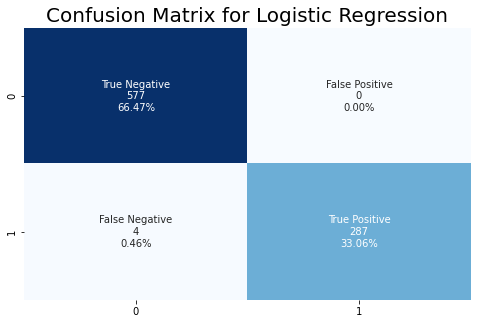

In [175]:
import numpy as np
#generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
 cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
 cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap='Blues', cbar = False)
plt.gcf().set_size_inches(8,5)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 20)
plt.show()

In [178]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
ks = DecisionTreeRegressor()
dt=ks.fit(X_train.values,y_train)

In [179]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, random_state = 101, test_size=0.20)


In [180]:
y_train.value_counts(normalize=True)

stabf
0        0.636783
1        0.363217
dtype: float64

In [181]:
#distribution in validation set
y_valid.value_counts(normalize=True)

stabf
0        0.651297
1        0.348703
dtype: float64

In [182]:
#shape of training set
X_train.shape, y_train.shape

((6938, 13), (6938, 1))

In [183]:
#shape of validation set
X_valid.shape, y_valid.shape

((1735, 13), (1735, 1))

In [184]:
#importimg decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [185]:
#importimg decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [186]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [187]:
#fitting the model
dt_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=10)

In [188]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [189]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.9988472622478386

In [190]:
#predictions on validation set
dt_model.predict(X_valid)

array([0, 0, 1, ..., 1, 1, 0])

In [191]:
dt_model.predict_proba(X_valid)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [192]:
a=dt_model.predict([[1,2,3,4,5,6,7,8,9,10,11,12,13]])
y_pred = dt_model.predict_proba(X_valid) [:,1]
print(a)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [193]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.4:
       new_y.append(0)
    else:
       new_y.append(1)

In [194]:
from sklearn.metrics import accuracy_score

In [195]:
accuracy_score(y_valid, new_y)


0.9988472622478386

In [196]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [197]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,1.0,0.998847
1,2,1.0,0.998847
2,3,1.0,0.998847
3,4,1.0,0.998847
4,5,1.0,0.998847


No handles with labels found to put in legend.


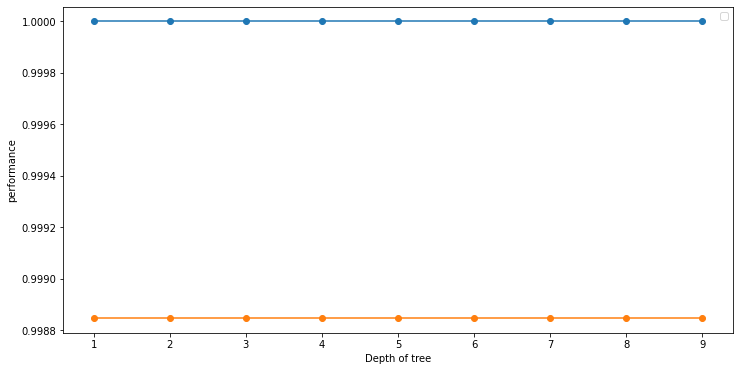

In [198]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [199]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=10)

In [200]:
#training score
dt_model.score(X_train, y_train)

1.0

In [201]:

#validation score
dt_model.score(X_valid, y_valid)

0.9988472622478386

[Text(0.5, 0.75, 'X[12] <= -0.431\ngini = 0.463\nsamples = 6938\nvalue = [4418, 2520]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2520\nvalue = [0, 2520]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4418\nvalue = [4418, 0]')]

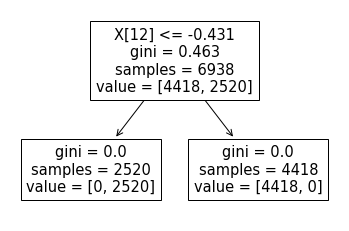

In [202]:
from sklearn import tree
tree.plot_tree(dt_model)

In [203]:
!pip install graphviz

In [204]:
!pip install pydotplus

In [205]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=10,filled=True)

In [206]:
!dot -Tpng tree.dot -o tree.png

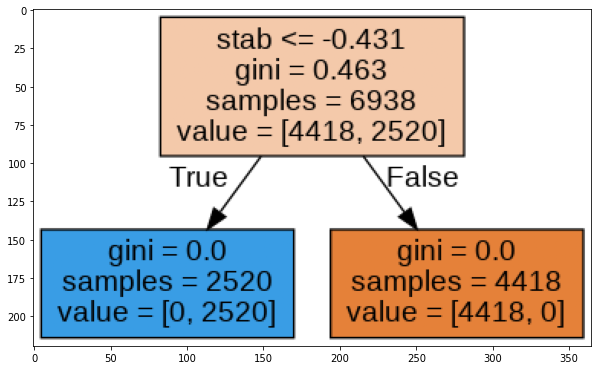

In [207]:

image =plt.imread('tree.png')
plt.figure(figsize=(10,10))
plt.imshow(image)

In [208]:
# Kernel = linear
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_LSVM = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred_LSVM)
print('confusion matrix:\n',cm)
#checking accuracy
from sklearn.metrics import accuracy_score
sva =accuracy_score(y_test,y_pred_LSVM)
print('accuracy score = ',sva)


confusion matrix:
 [[576   1]
 [  3 288]]
accuracy score =  0.9953917050691244


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [209]:
# SVM - Kernel -rbf
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_RSVM = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred_RSVM)
print('confusion matrix:\n',cm)
#checking accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred_RSVM)
print('accuracy score = ',sva2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix:
 [[576   1]
 [  4 287]]
accuracy score =  0.9942396313364056


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [210]:
from sklearn.metrics import mean_squared_error
print('mean square error is:')
mean_squared_error(y_valid,y_pred)

mean square error is:


0.0011527377521613833